# UH-WRRC FloPy Groundwater Modeling Workshop Practicum. 
### Starting from scratch:  defining and running a very simple groundwater model 
based on the stock FloPy Tutorial posted at: https://github.com/modflowpy/flopy/blob/develop/examples/Tutorials/Tutorial01/tutorial01.py

# The Import Command

first we define which modules (packages of scripts that other people have written) are going to be available in this notebook. This allows us to tap into the vast functionality of Python, without having to install everything ever made


In [2]:
import numpy as np                    # Numpy is a basic math/science package for arrays
import flopy                          # FloPy is our GW modeling package
import matplotlib.pyplot as plt       # this is for plotting things
import flopy.utils.binaryfile as bf   # this is a package from the flopy package, imported like this so we can call the package directly 

# Now start defining parts of the model

In [4]:
# Assign name and create modflow model object
modelname = 'tutorial1'
mf = flopy.modflow.Modflow(modelname, exe_name='mf2005')

### Create a square model geometry with 10 rows 10 columns and a cell size of 100 units

In [6]:
# Model domain and grid definition
Lx = 2000.               # this is the total width of the model grid
Ly = 1000.               # this is the total height of the model grid
ztop = 0.                # model top is at 0 m elevation
zbot = -50.              # model bottom is at -50
nlay = 1                 # this is a 1 layer model
nrow = 10                # 10 rows 
ncol = 20                # 10 columns   
delr = Lx/ncol           # model cell size, in x dimension here defined as a function of the length over the number of columns
delc = Ly/nrow           # model cell size, in y dimension  
delv = (ztop - zbot) / nlay                # model cell size, vertically elevation wize 
botm = np.linspace(ztop, zbot, nlay + 1)   # this is an array object, with two items, it has the 

###  Define the active and inactive areas of the model. This is how we shape the model into the shape of our own island. For now it will stay a square

In [7]:
# Variables for the BAS package
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)  # start with a grid of ones (one means active area in MODFLOW)
ibound[:, :, 0] = -1                                  # change the first column of the grid of ones to - 1 (means specified head) 
ibound[:, :, -1] = -1                                 # change the last column of the grid of ones to - 1 
strt = np.ones((nlay, nrow, ncol), dtype=np.float32)  # Create a grid of ones to represent staring heads
strt[:, :, 0] = 10.                                   # change the first row to a specified head of 10
strt[:, :, -1] = 0.                                   # change last row to specified head of 0.  This sets up the grounwater gradient that drives flow in the model

###  Define hydraulic conductivity values

In [8]:
# for now keep it simple with one value for the whole model
hk=10.
vka=10.

### Define a pumping well

In [39]:
# Create the well package
# Remember to use zero-based layer, row, column indices!
pumping_rate = -3000000000000.               
well_loc_rate = [[0, 3, 2, pumping_rate]]        # Defines the location (layer 0, row 3, column 2) and pumprate of the well
stress_period_data = {0: well_loc_rate}          # it needs to be a python dictionary

# Write all of the information we defined above to the FloPy model using these FloPy commands

In [40]:
# Write the discretization information from the 3rd cell to the model object
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=ztop, botm=botm[1:])

# Write the ibound and starting head information from the 4th cell to the model object
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

# Add LPF (hydraulic conductivity) package to the MODFLOW model
lpf = flopy.modflow.ModflowLpf(mf, hk=10., vka=10., ipakcb=53)

# write the pumping well data to the model object 
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)  # 

# This specifies how the model will save results as it runs, by defining an OC package to the MODFLOW model
spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(mf, stress_period_data=spd, compact=True)

# This specifies what set of built in equations to use to solve the model, there are a couple options 
# see https://water.usgs.gov/ogw/modflow-nwt/MODFLOW-NWT-Guide/index.html?pcg.htm  for other options
pcg = flopy.modflow.ModflowPcg(mf)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfdis.ModflowDis'> <class 'flopy.modflow.mfdis.ModflowDis'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfpcg.ModflowPcg'> <class 'flopy.modflow.mfpcg.ModflowPcg'>
replacing existing Package...


### This simple line of code takes all of the work we have done, and writes a series of .txt files that can be read by the MODFLOW exe 

In [41]:
# Write the MODFLOW model input files
mf.write_input()

# Run the MODFLOW model
note that this line of code looks in the current working directory and calls the 'mf2005.exe'. Therefore this file needs to be in the current working directory. This is as easy as copying it into the directory after dowloading it from: 
https://www.usgs.gov/software/modflow-2005-usgs-three-dimensional-finite-difference-ground-water-model

In [44]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: tutorial1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/05/31 10:56:23

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/05/31 10:56:23
 Elapsed run time:  0.006 Seconds

  Normal termination of simulation


# How to tell if it worked
#### If you get a message above that says: 


"""FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: tutorial1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/05/31  7:00:37

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn."""
 
 
 
#### Then the model has run successfully. This will also manifest if you look in the current working directory and see that there is a file written called "tutorial1.hds"  (Or whatever you have named you model in cell 2 above. This hds file is the output file that we can now read to see model results. 

### This code block makes a basic plot of the model results
contour lines show the head values going from 10 on left side to 0 on right side with well in the middle

C:\Users\WRRCuser\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


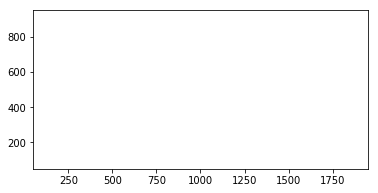

In [45]:
plt.subplot(1, 1, 1, aspect='equal')
hds = bf.HeadFile(modelname + '.hds')
head = hds.get_data(totim=1.0)
levels = np.arange(1, 10, 1)
extent = (delr / 2., Lx - delr / 2., Ly - delc / 2., delc / 2.)
plt.contour(head[0, :, :], levels=levels, extent=extent)
plt.savefig('tutorial1a.png')
plt.show()

## Make a more detailed plot of model results

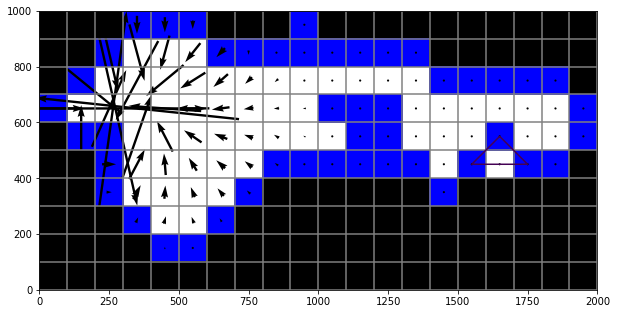

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

hds = bf.HeadFile(modelname+'.hds')
times = hds.get_times()
head = hds.get_data(totim=times[-1])
levels = np.linspace(0, 10, 11)

cbb = bf.CellBudgetFile(modelname+'.cbc')
kstpkper_list = cbb.get_kstpkper()
frf = cbb.get_data(text='FLOW RIGHT FACE', totim=times[-1])[0]
fff = cbb.get_data(text='FLOW FRONT FACE', totim=times[-1])[0]

modelmap = flopy.plot.ModelMap(model=mf, layer=0)
qm = modelmap.plot_ibound()
lc = modelmap.plot_grid()
cs = modelmap.contour_array(head, levels=levels)
quiver = modelmap.plot_discharge(frf, fff, head=head)
plt.savefig('tutorial1b.png')
plt.show()

# Now change the model geometry to fit the island

### What did mode geometry originally look like? 

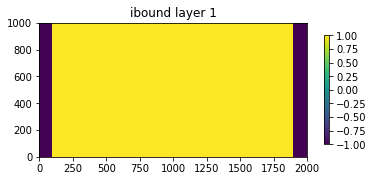

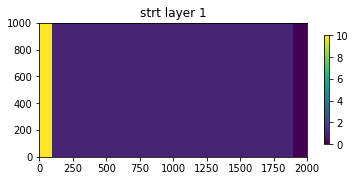

In [15]:
bas.plot()
plt.show()

### These are hand made arrays of new model active zone, and specified head zone, and also new starting and specified heads

In [27]:
# model active area (1s) and specified heads (-1s) 
ibound = np.array(
      [[[0,  0,  0,  -1,  -1,  -1,  0,  0,  0,  -1,  0,  0,  0,  0,  0,  0, 0,  0,  0, 0],
        [0,  0,  -1,  1,  1,  1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  0,  0, 0,  0,  0, 0],
        [0,  -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  -1,  -1, -1,  -1,  -1, 0],
        [-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  -1,  -1,  -1,  1,  1,  1, 1,  1,  1, -1],
        [0,  -1,  -1,  1,  1,  1,  1,  1,  1,  1,  1,  -1,  -1,  1,  1,  1, -1,  1,  1, -1],
        [0,  0,  -1,  1,  1,  1,  1,  1,  -1,  -1,  -1,  -1,  -1,  -1,  1,  -1, 1,  -1,  -1, 0],
        [0,  0,  -1,  1,  1,  1,  1,  -1,  0,  0,  0,  0,  0,  0,  -1,  0, 0,  0,  0, 0],
        [0,  0,  0,  -1,  1,  1,  -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
        [0,  0,  0,  0,  -1,  -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
        [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0]]])

# Starting and specified head elevations
strt = np.array(
      [[[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,  0,  0, 0],
        [0,  0,  0,  10,  10,  10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,  0,  0, 0],
        [0,  0,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  0,  0, 0,  0,  0, 0],
        [0,  0,  10,  10,  20,  20,  20,  20,  10,  10,  0,  0,  0,  10,  10,  10, 10,  10,  10, 0],
        [0,  0,  0,  10,  20,  20,  10,  10,  10,  10,  10,  0,  0,  10,  10,  10, 0,  10,  10, 0],
        [0,  0,  0,  10,  10,  10,  10,  10,  0,  0,  0,  0,  0,  0,  10,  0, 10,  0,  0, 0],
        [0,  0,  0,  10,  10,  10,  10,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,  0,  0, 0],
        [0,  0,  0,  0,  10,  10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
        [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
        [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0]]])

In [28]:
# Write the ibound and starting head information from the 4th cell to the model object
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

# specify recharge value
rch = flopy.modflow.ModflowRch(mf, rech=.1)

# Write the MODFLOW model input files
mf.write_input()

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfrch.ModflowRch'> <class 'flopy.modflow.mfrch.ModflowRch'>
replacing existing Package...


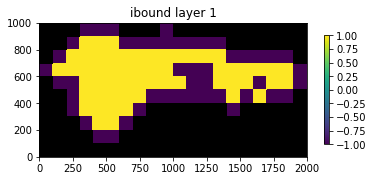

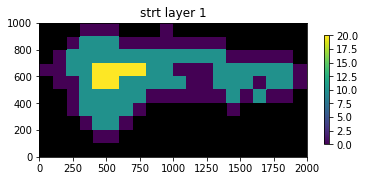

In [24]:
# show what we changed
bas.plot()
plt.show()

In [25]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: tutorial1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/05/31 10:54:20

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/05/31 10:54:20
 Elapsed run time:  0.006 Seconds

  Normal termination of simulation


### This code block makes a basic plot of the model results

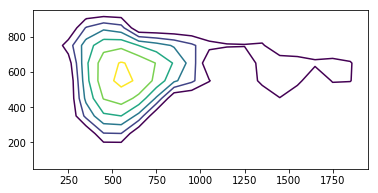

In [26]:
plt.subplot(1, 1, 1, aspect='equal')
hds = bf.HeadFile(modelname + '.hds')
head = hds.get_data(totim=1.0)
levels = np.arange(1, 10, 1)
extent = (delr / 2., Lx - delr / 2., Ly - delc / 2., delc / 2.)
plt.contour(head[0, :, :], levels=levels, extent=extent)
plt.savefig('tutorial1a.png')
plt.show()

## Make a slightly more detailed plot of model results

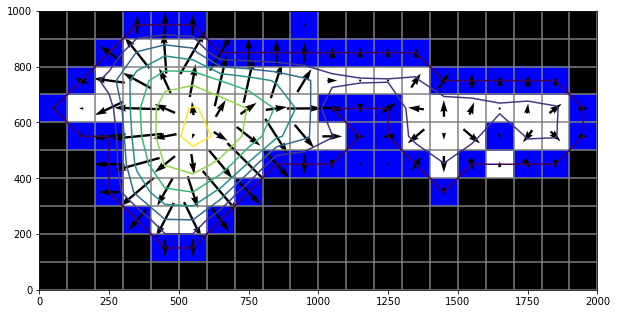

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

hds = bf.HeadFile(modelname+'.hds')
times = hds.get_times()
head = hds.get_data(totim=times[-1])
levels = np.linspace(0, 10, 11)

cbb = bf.CellBudgetFile(modelname+'.cbc')
kstpkper_list = cbb.get_kstpkper()
frf = cbb.get_data(text='FLOW RIGHT FACE', totim=times[-1])[0]
fff = cbb.get_data(text='FLOW FRONT FACE', totim=times[-1])[0]

modelmap = flopy.plot.ModelMap(model=mf, layer=0)
qm = modelmap.plot_ibound()
lc = modelmap.plot_grid()
cs = modelmap.contour_array(head, levels=levels)
quiver = modelmap.plot_discharge(frf, fff, head=head)
plt.savefig('tutorial1b.png')
plt.show()